In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
 

sns.set()  # set the styling for seaborn plots
sns.set_palette('husl')

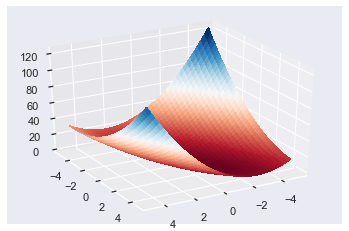

In [2]:
# Part 1: plot f(x,y)
def f(x,y):
    return x - y + 2*x**2 + 2*x*y+ y**2

x = np.arange(-5, 5, 0.25)
y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(x, y)
Z = f(X,Y)

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cmap=cm.RdBu,cstride=1,linewidth=0, antialiased=False)
ax.view_init(30,60) #rotate the graph a little bit, easier to see the shape
plt.show()




In [3]:
# Part 2: Calculate the partial derivatives and run gradient descent to find min

def dfdx(x,y):
    return 1 + 4*x + 2*y

def dfdy(x,y):
    return -1 +2*x + 2*y

def grad_vector(x,y):
    return np.array([dfdx(x,y), dfdy(x,y)])

def grad_descent_mult(df,p_init,learn_rate):
    eps = 0.00000001 
    grad_iter = 1
    seq_x = []
    seq_y = []
    p_next = np.subtract(p_init, learn_rate*df(p_init[0],p_init[1]))
    seq_x = np.append(seq_x, p_next[0])
    seq_y = np.append(seq_y, p_next[1])
    p_prev = p_init
    while np.linalg.norm(np.subtract(p_next,p_prev)) > eps:
        
        p_prev = p_next
        p_next = p_prev - learn_rate*df(p_prev[0],p_prev[1])
        grad_iter += 1
        seq_x = np.append(seq_x, p_next[0])
        seq_y = np.append(seq_y, p_next[1])
    return (p_next, grad_iter, seq_x,seq_y)

grad_output = grad_descent_mult(grad_vector, np.array([3,15]), 0.001) #random init point
print('Min (x,y) ',grad_output[0], '\nMin value f(x,y)',f(grad_output[0][0],grad_output[0][1]))


Min (x,y)  [-1.00000688  1.50001113] 
Min value f(x,y) -1.2499999999346647


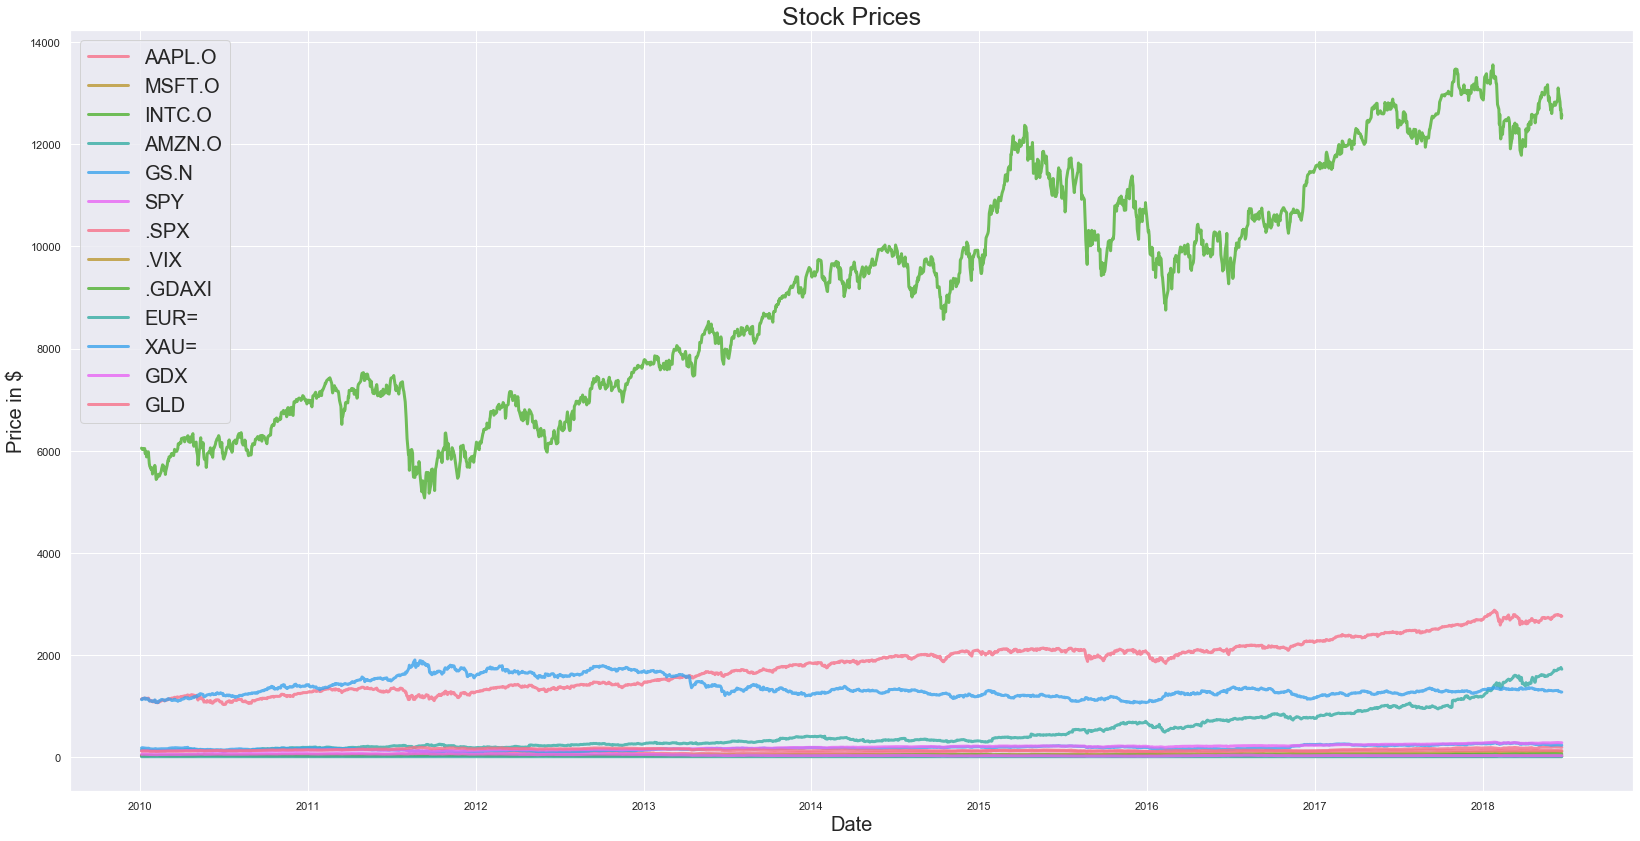

In [4]:
# Part 3: Read stocks.csv and plot
#load in stocks.csv (note: I saved my file in the same folder as notebook)
stocks_file = 'stocks.csv'
prices = pd.read_csv(stocks_file,index_col=0,parse_dates=[0],header=0)
prices.dropna(inplace=True)

#Plot (hard to see some values, in practice, maybe plot currencies separately)
plt.figure(figsize=(28,14))
for c in prices.columns.values:
    plt.plot(prices.index, prices[c], lw=3, alpha=0.8, label=c)
plt.legend(loc='upper left', fontsize=20)
plt.title("Stock Prices",fontsize=25)
plt.ylabel('Price in $',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.show()


In [5]:
#Part 4: Summary statistics of returns
returns = prices.pct_change()[1:]
print(returns.describe())

#In case I want to work with log returns, I have it here.  Rest will be done with returns for now
logret = np.log(prices) - np.log(prices.shift(1))


            AAPL.O       MSFT.O       INTC.O       AMZN.O         GS.N  \
count  2097.000000  2097.000000  2097.000000  2097.000000  2097.000000   
mean      0.000988     0.000664     0.000553     0.001410     0.000267   
std       0.016090     0.014322     0.015066     0.019685     0.016691   
min      -0.123549    -0.113995    -0.091020    -0.126568    -0.127910   
25%      -0.006925    -0.006745    -0.007782    -0.008292    -0.008365   
50%       0.000756     0.000336     0.000563     0.001105     0.000402   
75%       0.009631     0.007935     0.008521     0.011764     0.009337   
max       0.088741     0.104522     0.105519     0.157457     0.094705   

               SPY         .SPX         .VIX       .GDAXI         EUR=  \
count  2097.000000  2097.000000  2097.000000  2097.000000  2097.000000   
mean      0.000467     0.000468     0.002956     0.000427    -0.000083   
std       0.009408     0.009432     0.082719     0.012452     0.005978   
min      -0.065123    -0.066634    -0

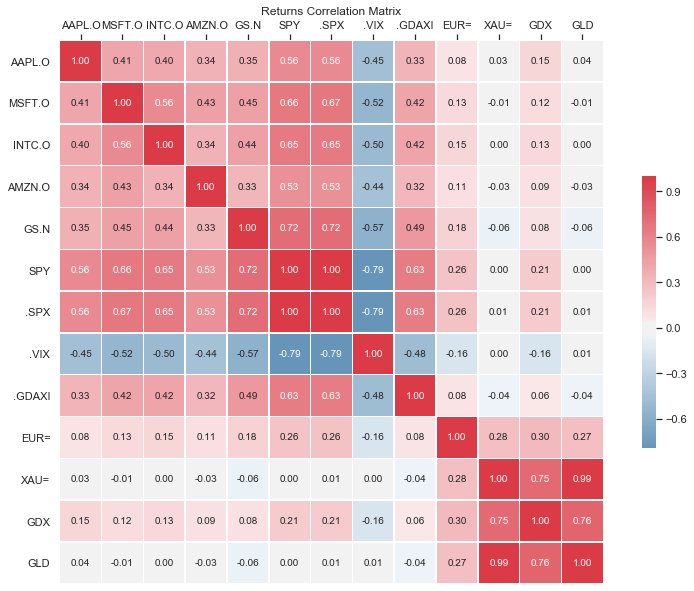

In [6]:
#Part 5: Correlation matrix

corr = returns.corr() # correlation matrix
plt.figure(figsize=(14,10))
cmap = sns.diverging_palette(240, 10,n=9, as_cmap=True)
ax = sns.heatmap(corr, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True,fmt=".2f")
ax.xaxis.set_ticks_position('top')
ax.set_title("Returns Correlation Matrix",y=1.05)
plt.show()
f = ax.get_figure()

In [7]:
# Part 6: Eigenvalues
w,v = np.linalg.eig(corr)  #w = eigenvalues, v=eigenvectors
print("Eigenvalues",w)

Eigenvalues [5.46790955e+00 2.77355552e+00 8.74123328e-01 1.14198760e-02
 3.78693028e-03 1.75721176e-01 7.52832797e-01 6.49810219e-01
 6.34491777e-01 2.93767103e-01 5.31770365e-01 4.06380652e-01
 4.24430709e-01]
